# ДЗ: Знакомство с нейронными сетями

In [1]:
import graphviz
import sympy
sympy.init_printing(use_unicode=True)

### №1
Вспомните рассмотренные на занятии функции активации нейронной сети.
Чему равна производная сигмоидной функции активации? Выразите ответ через сигмоидную функцию.

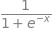

In [2]:
x = sympy.symbols("x")
sigmoid = 1/(1+sympy.exp(-x))
sigmoid

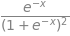

In [3]:
# производная сигмоидной функции активации
dsigm = sympy.diff(sigmoid, x)
dsigm

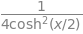

In [4]:
sympy.simplify(dsigm)

In [5]:
# производная, выраженная через сигмоиду
Sigmoid = sympy.symbols("Sigmoid")
dsigm.subs(sigmoid, Sigmoid)

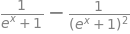

In [6]:
sympy.apart(dsigm)

In [7]:
f = sympy.symbols("f")
sympy.factor(sympy.apart(dsigm).subs(1/(1+sympy.exp(x)), f))

### №2
Пусть на вход искусственному нейрону подается число x, а затем домножается на вес связи 
$w_1$, внутри нейрона прибавляется вес-смещение $w_0$ и после этого применяется функция активации Relu. 

Нарисуйте схему такого нейрона.

Допустим, что в наш нейрон подали вход x=4 и получили ответ 1, потом подали вход x=2  и получили ответ 3.

Чему равны веса $w_1, w_0$?

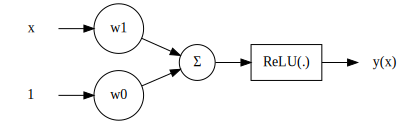

In [8]:
neuron = graphviz.Source('digraph G{ \
                            rankdir=LR; \
                            { node [shape = "none"]; x; 1; "y(x)"; } \
                            { node [shape = "circle"]; w1; w0; Σ } \
                            { node [shape = "rect"]; "ReLU(.)" } \
                            "x" -> "w1"; \
                            "1" -> "w0"; \
                            "w1" -> "Σ"; \
                            "w0" -> "Σ"; \
                            "Σ" -> "ReLU(.)"; \
                            "ReLU(.)" -> "y(x)";}')
neuron

In [9]:
# нахождение весов путём решения СЛАУ
w1, w0 = sympy.symbols("w1 w0")
sympy.solve([w1*4+w0-1, w1*2+w0-3], [w1,w0])

In [10]:
# алгоритм обратного распространения ошибки

EPS = 0.001  # допустимая погрешность
lr = 0.01  # learning rate
w1, w0 = -1.25, 4.75  # начальное приближение весов

W1, W0 = sympy.symbols("W1 W0")
X, Y = sympy.symbols("X Y", positive=True)
Y = W1*X+W0

Q = []
for (x0, y0) in ((4, 1), (2, 3)):
    err = sympy.oo
    while err > EPS:
        L = (Y.subs(X, x0) - y0)**2
        err = L.subs(W1, w1).subs(W0, w0)
        dL_w1, dL_w0 = sympy.diff(L, W1), sympy.diff(L, W0)
        dL1, dL0 = dL_w1.subs(W1, w1).subs(W0, w0), dL_w0.subs(W1, w1).subs(W0, w0)
        w1, w0 = w1 - lr * dL1, w0 - lr * dL0
        print(f"{[w0, w1]}, {err=}")
    Q.append([w0, w1, err])
# print(Q)
q = list(zip(*Q))
w0 = sum(q[0]) / len(q[0])
w1 = sum(q[1]) / len(q[1])
print(w0, w1)

[4.77500000000000, -1.15000000000000], err=1.56250000000000
[4.79150000000000, -1.08400000000000], err=0.680624999999999
[4.80239000000000, -1.04044000000000], err=0.296480250000000
[4.80957740000000, -1.01169040000000], err=0.129146796900000
[4.81432108400000, -0.992715664000000], err=0.0562563447296398
[4.81745191544000, -0.980192338240000], err=0.0245052637642310
[4.81951826419040, -0.971926943238400], err=0.0106744928956991
[4.82088205436566, -0.966471782537344], err=0.00464980910536648
[4.82178215588134, -0.962871376474647], err=0.00202545684629758
[4.82237622288168, -0.960495108473267], err=0.000882289002247188
[4.82434850276298, -0.956550548710673], err=0.00972471982542222
[4.82612355465615, -0.953000444924339], err=0.00787702305859192
[4.82772110136000, -0.949805351516637], err=0.00638038867745941
[4.82915889339347, -0.946929767449706], err=0.00516811482874213
[4.83045290622358, -0.944341741789469], err=0.00418617301128112
[4.83161751777069, -0.942012518695254], err=0.003390800

Видно, что веса сходятся к точному решению (только очень медленно).